# **1. Preparing the libraries**

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install graphviz
!pip install jupyter
!pip install openpyxl
!pip install pydot pydotplus


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# **2. Preparing the datasets**

## **2.1. Get data from file**

In [3]:
import pandas as pd

column_names = [
    "species",          # Target: Adelie: 0 / Gentoo: 1 / Chinstrap: 2
    "island",           # Torgersen / Biscoe / Dream
    "bill length",      # Real number
    "bill depth",       # Real number
    "flipper length",   # Integer
    "body mass",        # Integer
    "sex",              # Male / Female
    "year"              # Integer - year
]

url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
data_frame = pd.read_csv(url, skiprows=1, names=column_names, na_values="NA")
# data_frame["species"] = data_frame["species"].map({"Adelie": 0, "Gentoo": 1, "Chinstrap": 2})

# Fill NA
for i in range (2, 6):
    data_frame[column_names[i]] = data_frame[column_names[i]].fillna(data_frame[column_names[i]].median())
data_frame["sex"] = data_frame["sex"].fillna(data_frame["sex"].mode()[0])

# One-hot encoding
data_frame = pd.get_dummies(data_frame, columns=['island', 'sex'], prefix=['island', 'sex'])


print(data_frame)


       species  bill length  bill depth  flipper length  body mass  year  \
0       Adelie        39.10        18.7           181.0     3750.0  2007   
1       Adelie        39.50        17.4           186.0     3800.0  2007   
2       Adelie        40.30        18.0           195.0     3250.0  2007   
3       Adelie        44.45        17.3           197.0     4050.0  2007   
4       Adelie        36.70        19.3           193.0     3450.0  2007   
..         ...          ...         ...             ...        ...   ...   
339  Chinstrap        55.80        19.8           207.0     4000.0  2009   
340  Chinstrap        43.50        18.1           202.0     3400.0  2009   
341  Chinstrap        49.60        18.2           193.0     3775.0  2009   
342  Chinstrap        50.80        19.0           210.0     4100.0  2009   
343  Chinstrap        50.20        18.7           198.0     3775.0  2009   

     island_Biscoe  island_Dream  island_Torgersen  sex_female  sex_male  
0           

## **2.2. Splitting the datasets**

In [4]:
X = data_frame.drop("species", axis=1)
y = data_frame["species"]

from sklearn.model_selection import train_test_split

proportions = [0.4, 0.6, 0.8, 0.9]

subsets = {}

for ratio in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size = ratio,
        test_size = 1-ratio,
        stratify = y,
        random_state = 42,
        shuffle=True
    )
    
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"  
    # cộng với 0.001 để tránh làm tròn xuống =))
    subsets[f"feature_train_{key}"] = X_train
    subsets[f"label_train_{key}"] = y_train
    subsets[f"feature_test_{key}"] = X_test
    subsets[f"label_test_{key}"] = y_test
    
print("Length of subsets is 16:", len(subsets) == 16)

Length of subsets is 16: True


## **2.3. Visualize the dataset**

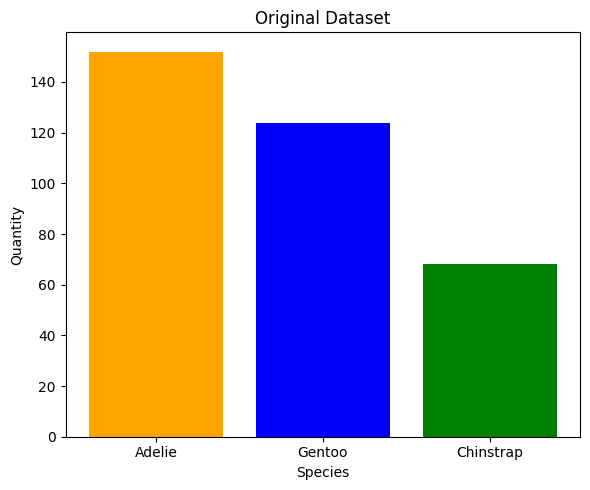

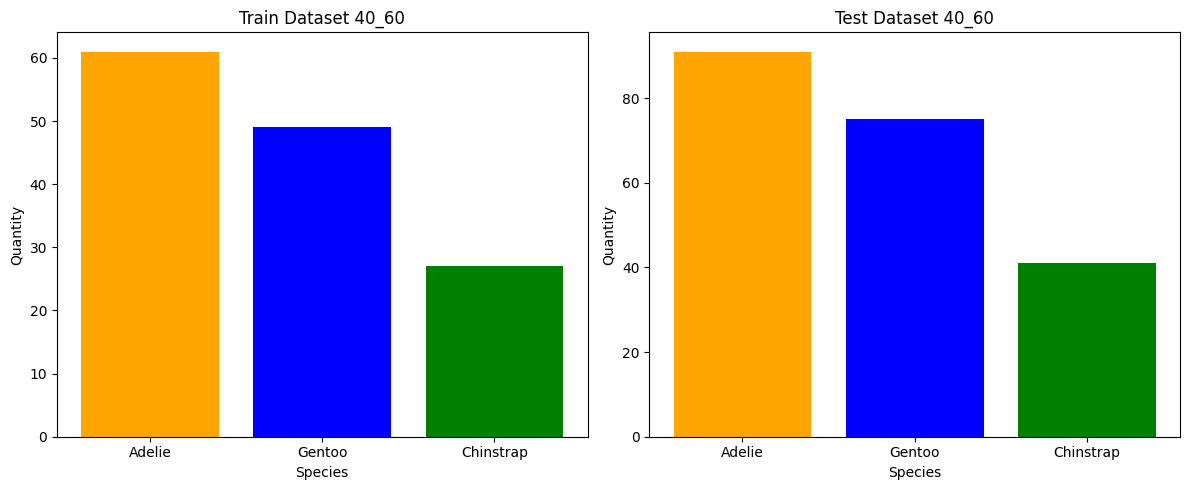

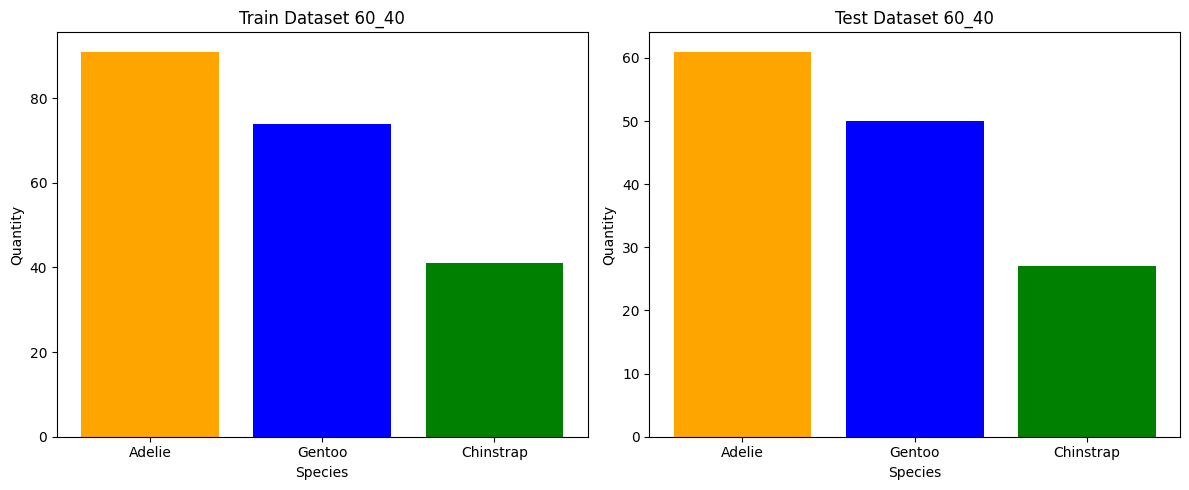

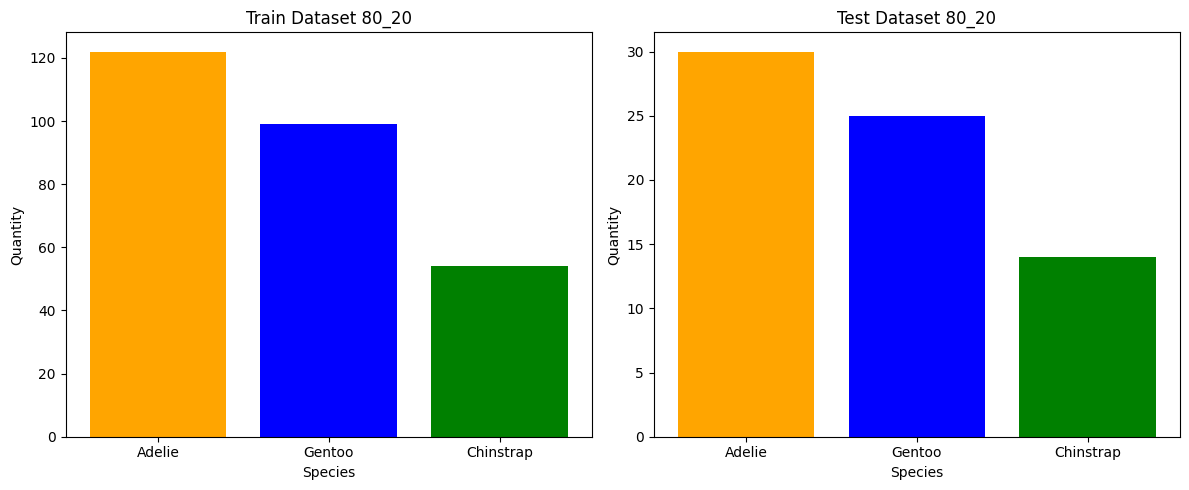

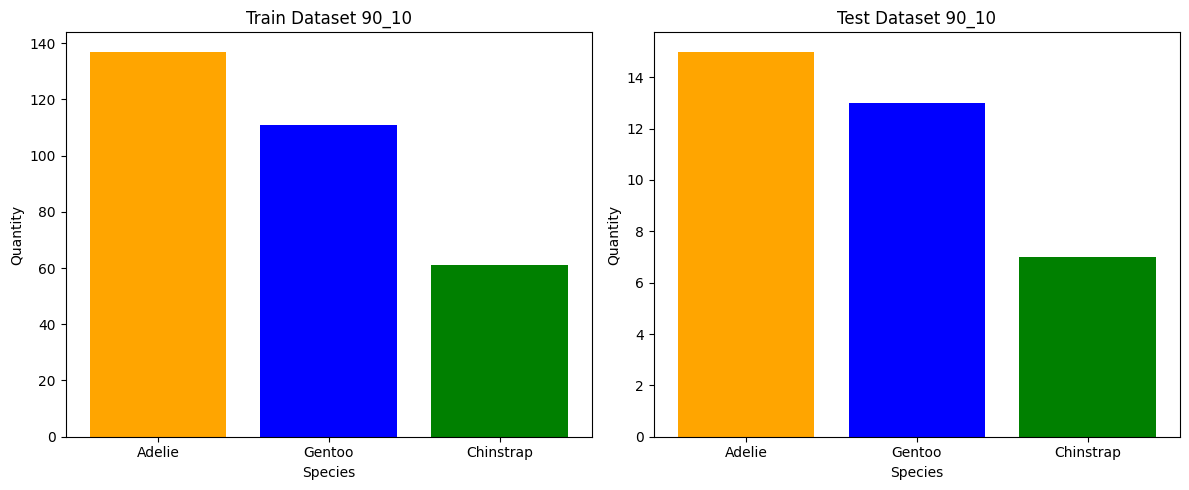

In [6]:
import matplotlib.pyplot as plt

def plot_distribution(y_train, y_test, title_train, title_test, ratio):
    # Define colors and class order
    class_order = ['Adelie', 'Gentoo', 'Chinstrap']
    colors = ['orange', 'blue', 'green']  # Adelie=orange, Gentoo=blue, Chinstrap=green
    
    if y_train.equals(y_test):
        # Plot one graph for identical datasets (original dataset)
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        
        counts = y_train.value_counts()
        labels = counts.index
        values = counts.values
        
        ax.bar(labels, values, color=colors)
        ax.set_title(f"{title_train}")
        ax.set_xlabel("Species")
        ax.set_ylabel("Quantity")
        ax.set_xticks(labels)
        plt.savefig("img/palmer_penguins/bar_chart_original_dataset.png", format='png', dpi=300)
        
    else:
        # Plot two side-by-side graphs for train and test
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Training set
        counts_train = y_train.value_counts()
        labels_train = counts_train.index
        values_train = counts_train.values
        axes[0].bar(labels_train, values_train, color=colors)
        axes[0].set_title(title_train)
        axes[0].set_xlabel("Species")
        axes[0].set_ylabel("Quantity")
        axes[0].set_xticks(labels_train)
        
        # Test set
        counts_test = y_test.value_counts()
        labels_test = counts_test.index
        values_test = counts_test.values
        axes[1].bar(labels_test, values_test, color=colors)
        axes[1].set_title(title_test)
        axes[1].set_xlabel("Species")
        axes[1].set_ylabel("Quantity")
        axes[1].set_xticks(labels_test)
        plt.savefig("img/palmer_penguins/bar_chart_dataset_" + str(int(ratio * 100)) + '_' + str(int((1 - ratio + 0.001) * 100)) + ".png", format='png', dpi=300)

    plt.tight_layout()
    plt.show()

# Visualize the Original Dataset
plot_distribution(y, y, "Original Dataset", "Original Dataset", 1)

# Visualize Train and Test Datasets for each proportion
for ratio in proportions:
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}" 
    plot_distribution(
        subsets[f"label_train_{key}"],
        subsets[f"label_test_{key}"],
        f"Train Dataset {key}",
        f"Test Dataset {key}",
        ratio
    )

# **3. Building the decision trees classifiers based on proportions**

## **3.1. Get the decision trees based on proportions**

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Store the decision trees for each split
decision_trees = {}

# Loop through each train/test split
for ratio in proportions:
    # Create the key (example: 40_60, 60_40, etc.)
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}" 
    
    # Get feature_train and label_train
    X_train = subsets[f"feature_train_{key}"]
    y_train = subsets[f"label_train_{key}"]

    # Create and train the Decision Tree
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    decision_trees[f"decision_tree_{key}"] = clf
    
print("There are 4 decision trees for 4 different ratios:", len(decision_trees) == 4)

There are 4 decision trees for 4 different ratios: True


## **3.2. Draw the decision trees based on proportions**

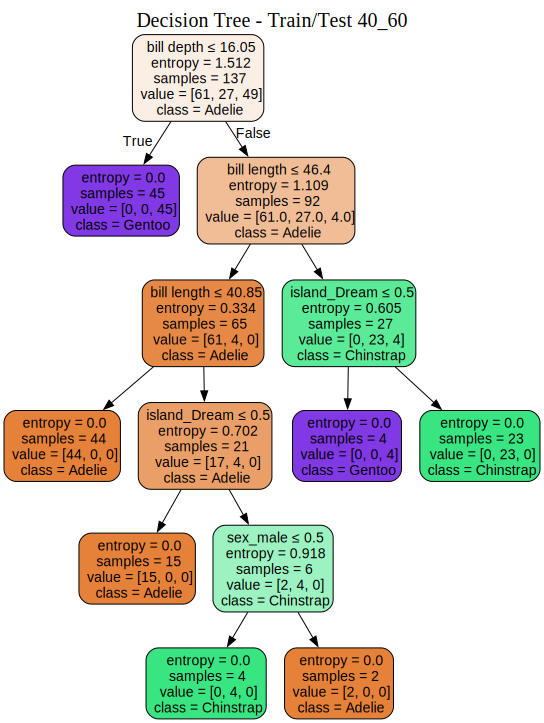

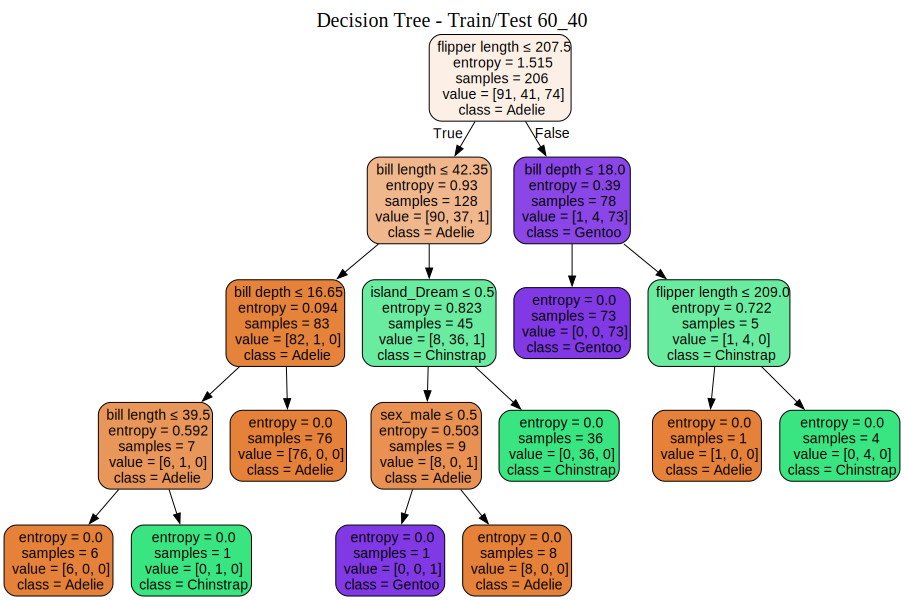

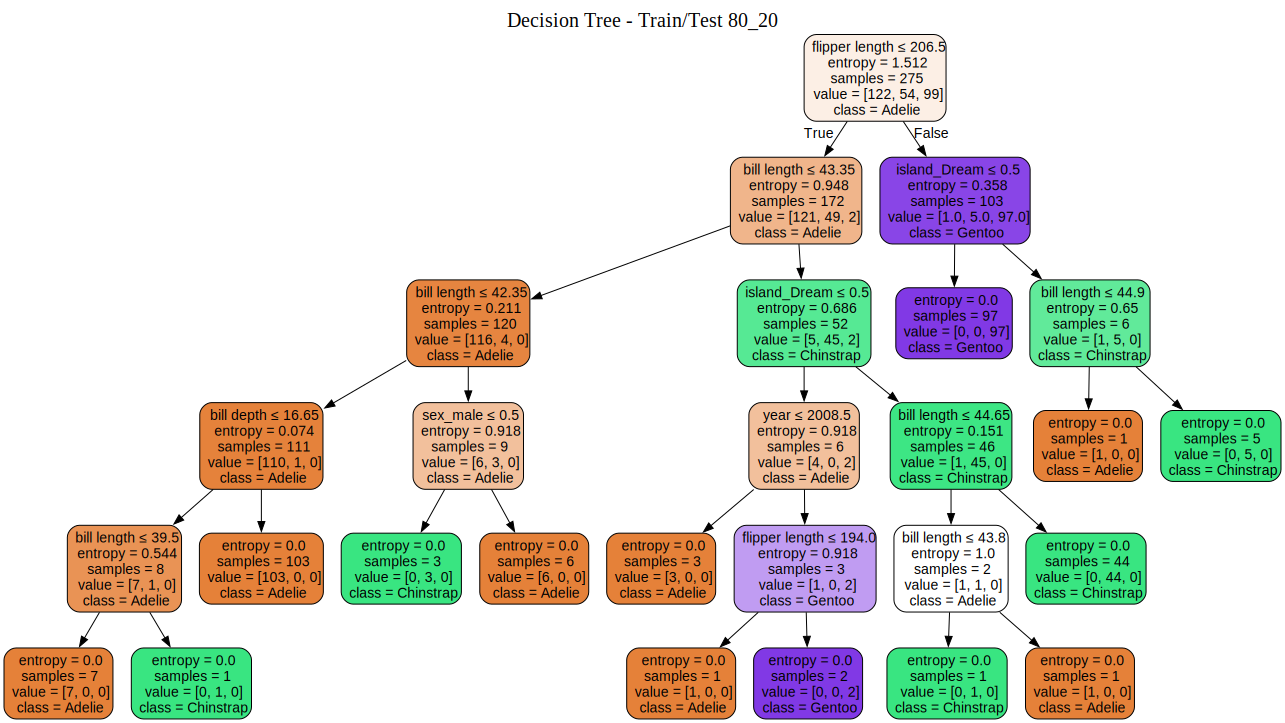

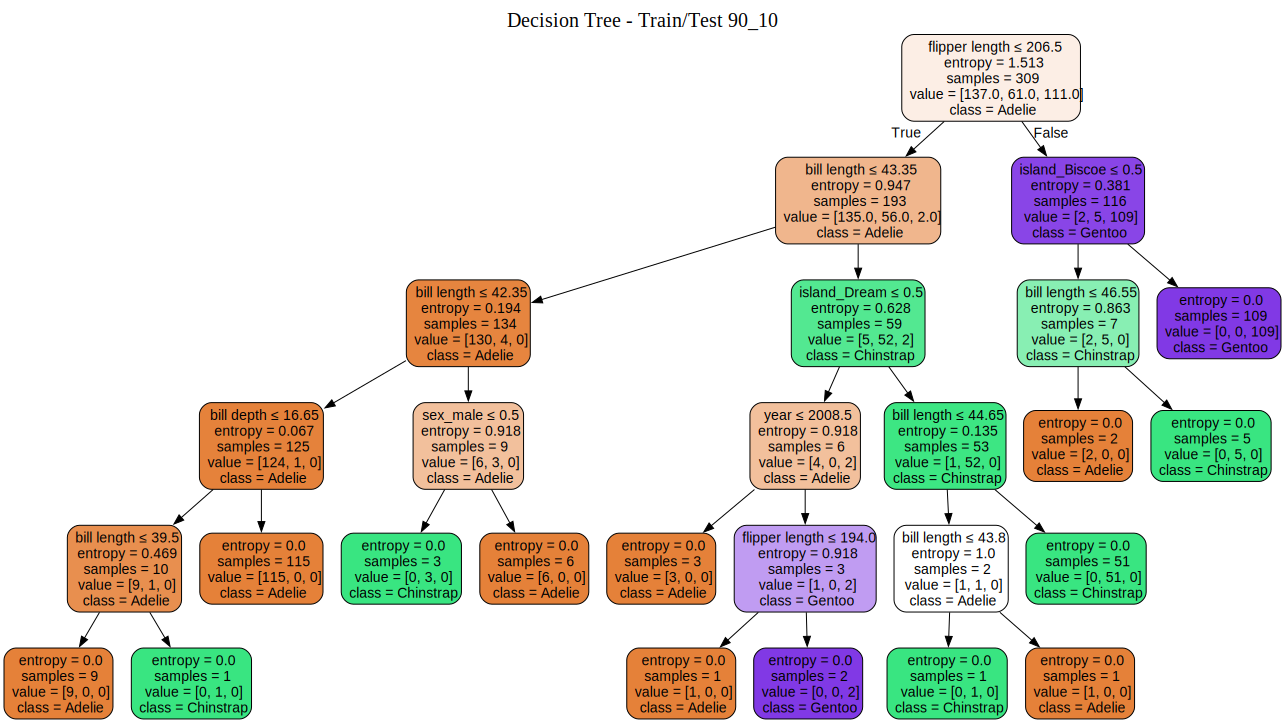

In [10]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

for ratio in proportions:
    # Create the key (example: 40_60, 60_40, etc.)
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    
    # Get feature_train and label_train
    X_train = subsets[f"feature_train_{key}"]
    clf_train = decision_trees[f"decision_tree_{key}"]
    
    # Export the decision tree to DOT format, adding a name
    dot_data = export_graphviz(
        clf_train,  
        feature_names=X_train.columns, 
        class_names=clf_train.classes_, 
        filled=True, 
        rounded=True,
        special_characters=True,
        out_file=None,
    )
    
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Train/Test {key}";\nlabelloc=top;\nfontsize=20;'
    )    
    
    graph = graphviz.Source(dot_data)
    graph.render("img/palmer_penguins/decision_tree_" + key, format='png', cleanup=True)
    display(graph)

## **4. Evaluating the decision tree classifiers**

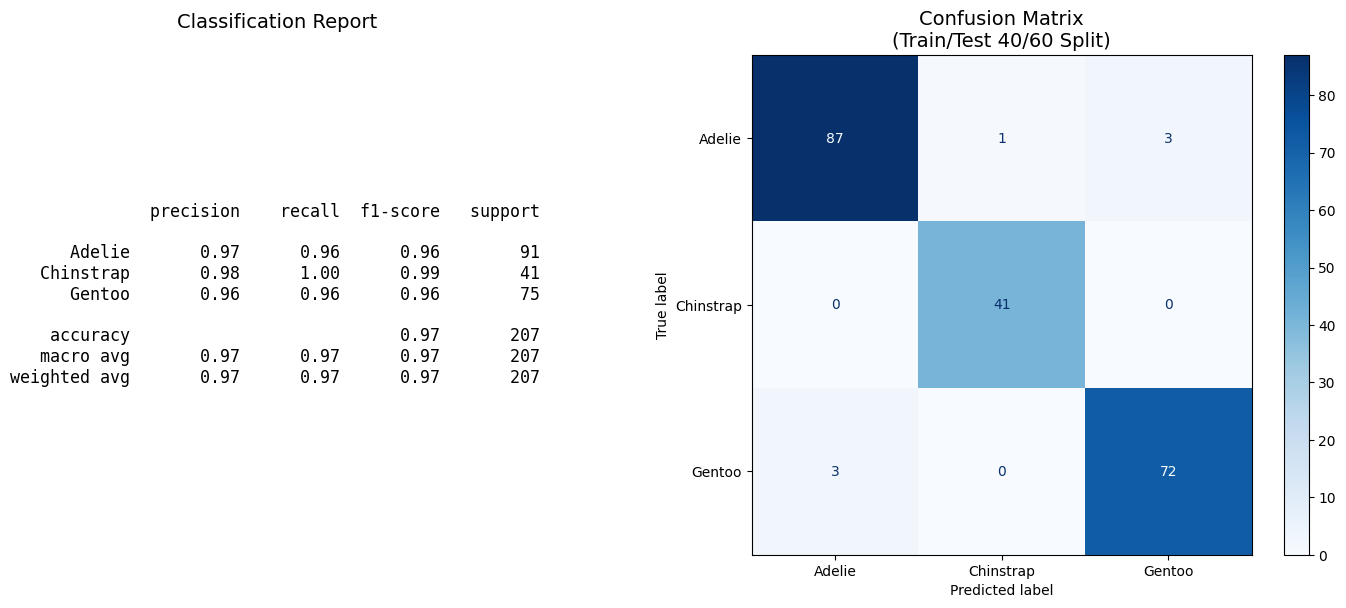

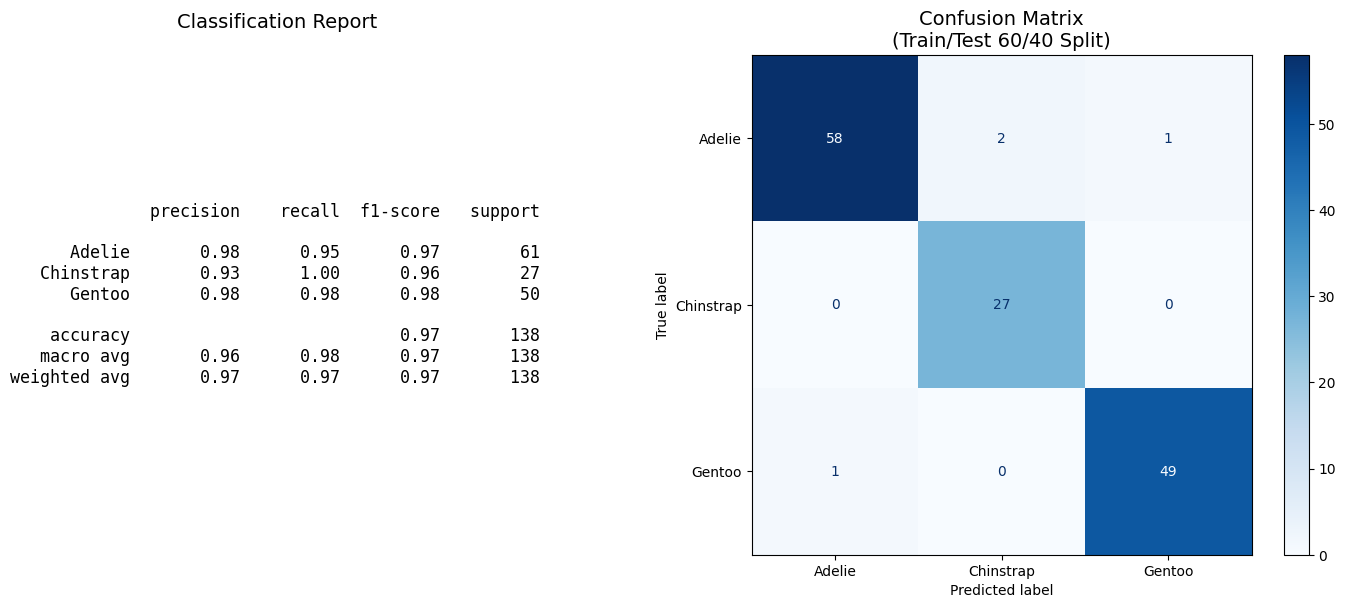

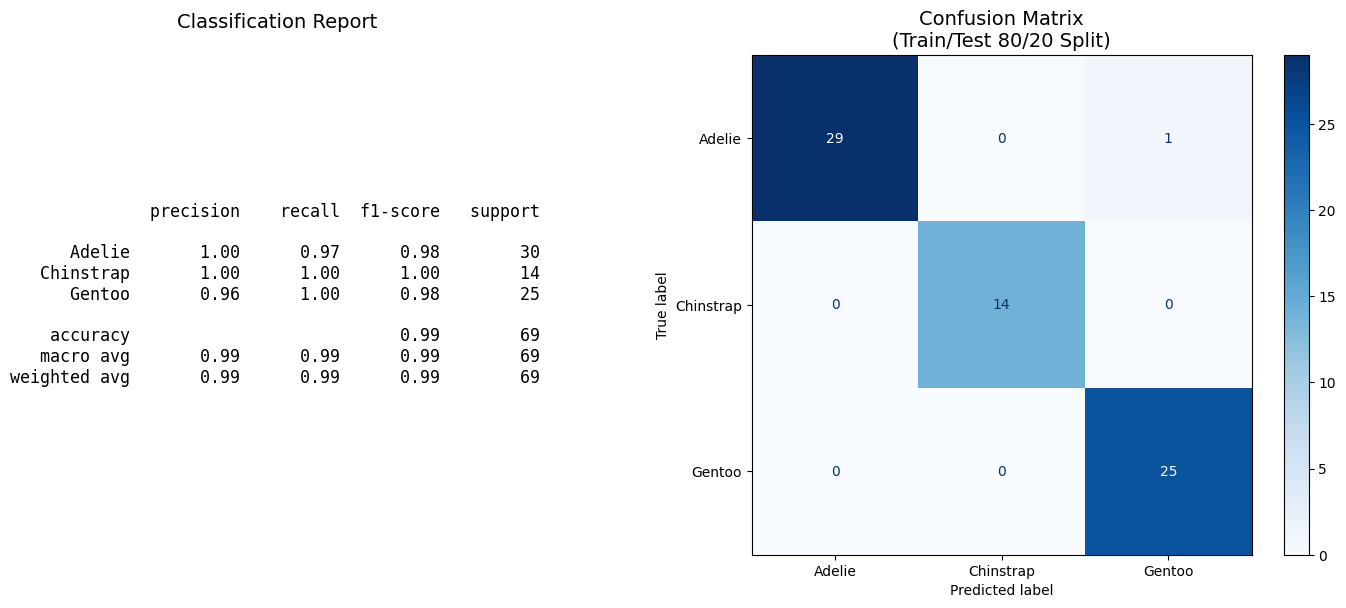

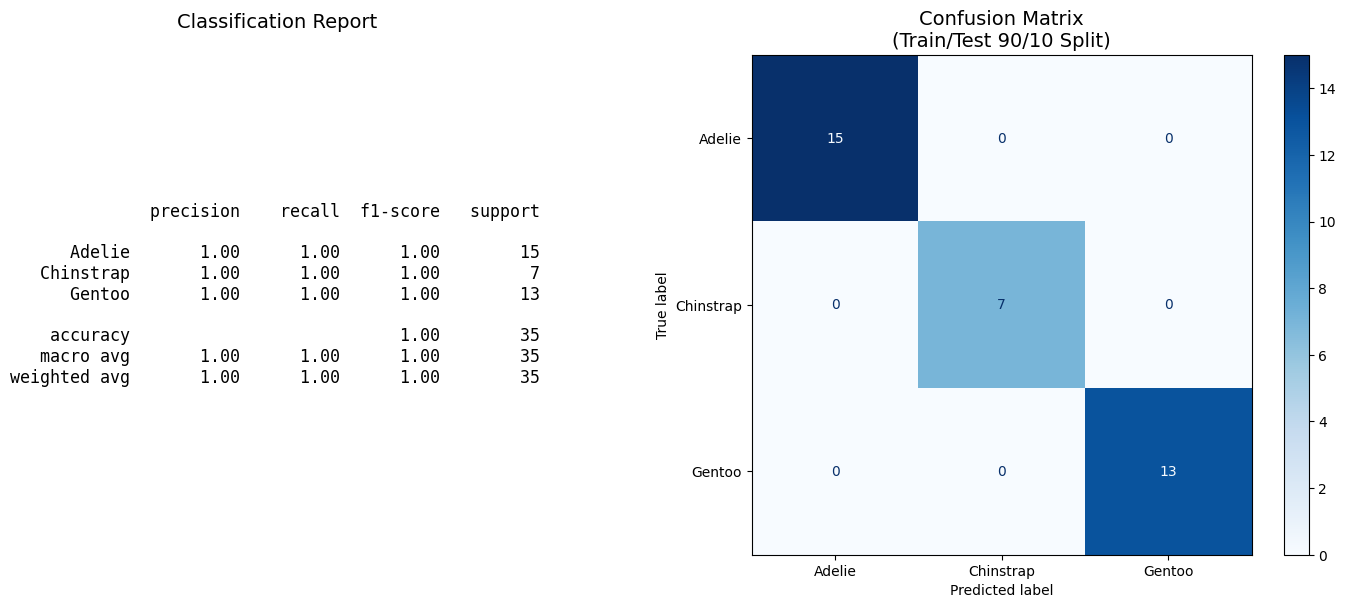

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

for ratio in proportions:
    # Create key like 80_20
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    
    # Load test data
    X_test = subsets[f"feature_test_{key}"]
    y_test = subsets[f"label_test_{key}"]
    
    # Load trained classifier
    clf = decision_trees[f"decision_tree_{key}"]
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Classification report as text
    report_text = classification_report(y_test, y_pred, target_names=["Adelie", "Chinstrap", "Gentoo"])
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot side-by-side: Classification Report (left) and Confusion Matrix (right)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1.2]})
    
    # Plot classification report text on the left
    axes[0].axis('off')  # Turn off the axes
    axes[0].text(0, 0.5, report_text, fontsize=12, ha='left', va='center', wrap=True, family='monospace')
    axes[0].set_title("Classification Report", fontsize=14, pad=20)
    
    # Plot confusion matrix on the right
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Adelie", "Chinstrap", "Gentoo"])
    disp.plot(cmap='Blues', ax=axes[1], colorbar=True)
    axes[1].set_title(f"Confusion Matrix\n(Train/Test {int(ratio * 100)}/{int((1 - ratio + 0.001) * 100)} Split)", fontsize=14)
    
    plt.savefig("img/palmer_penguins/evaluate_dataset_" + key + ".png", format='png', dpi=300)
    plt.tight_layout()
    plt.show()


## **5. The depth and accuracy of a decision tree**

## **5.1. Draw the decision trees**

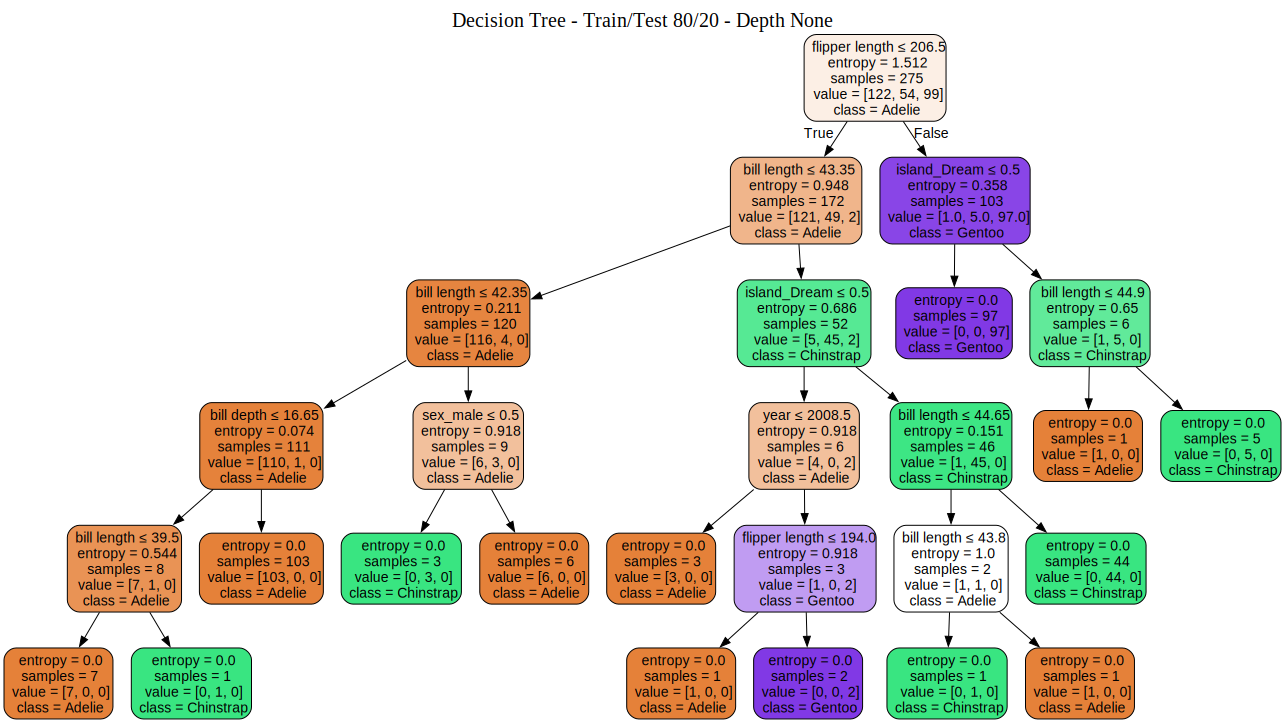

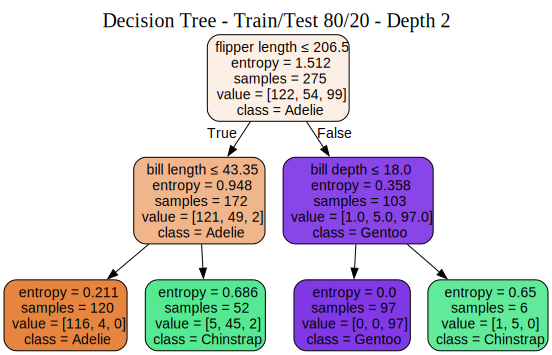

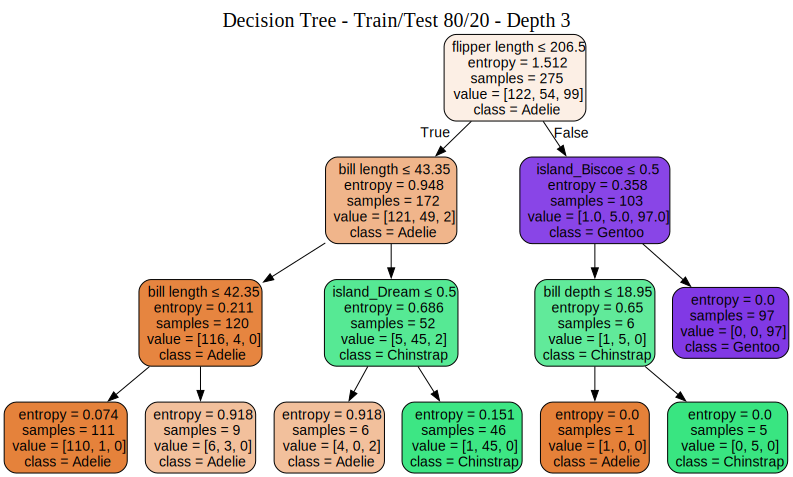

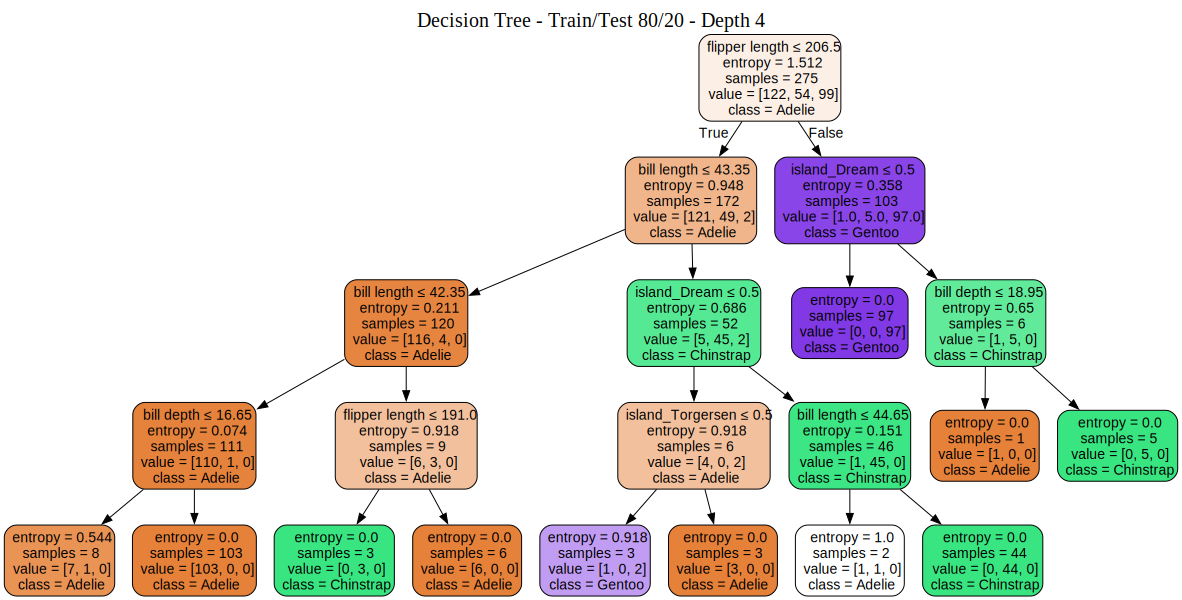

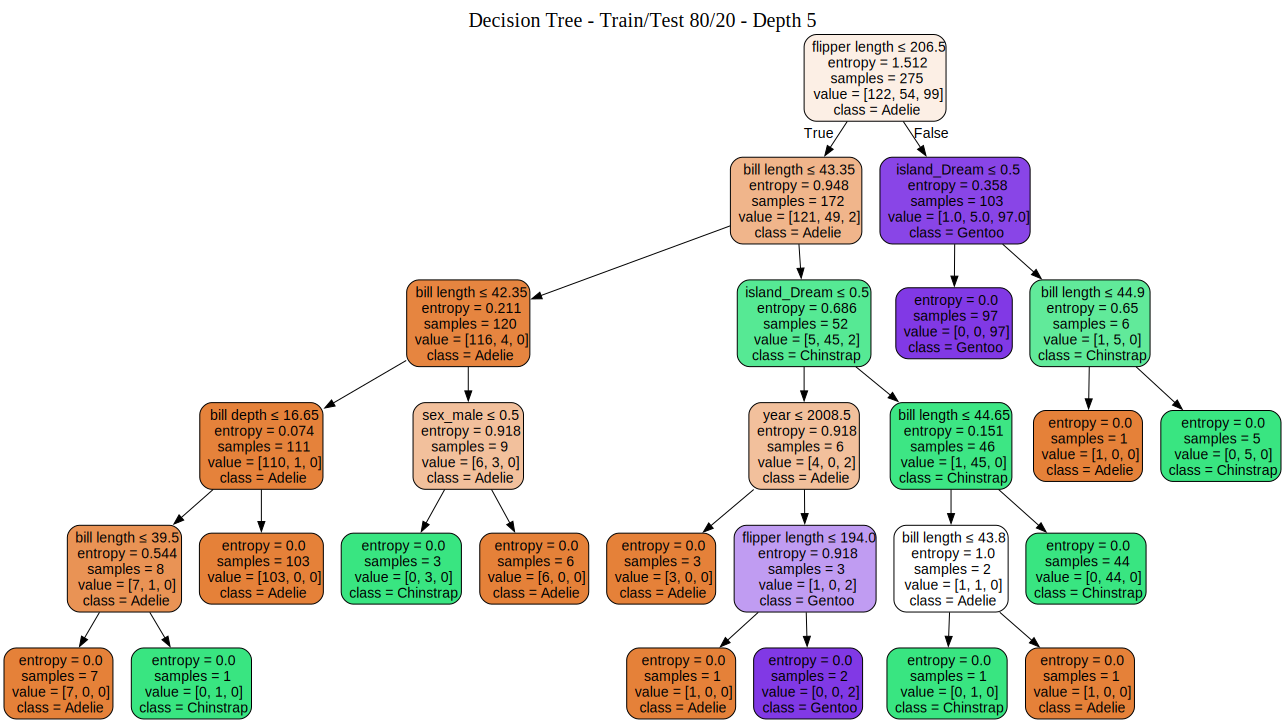

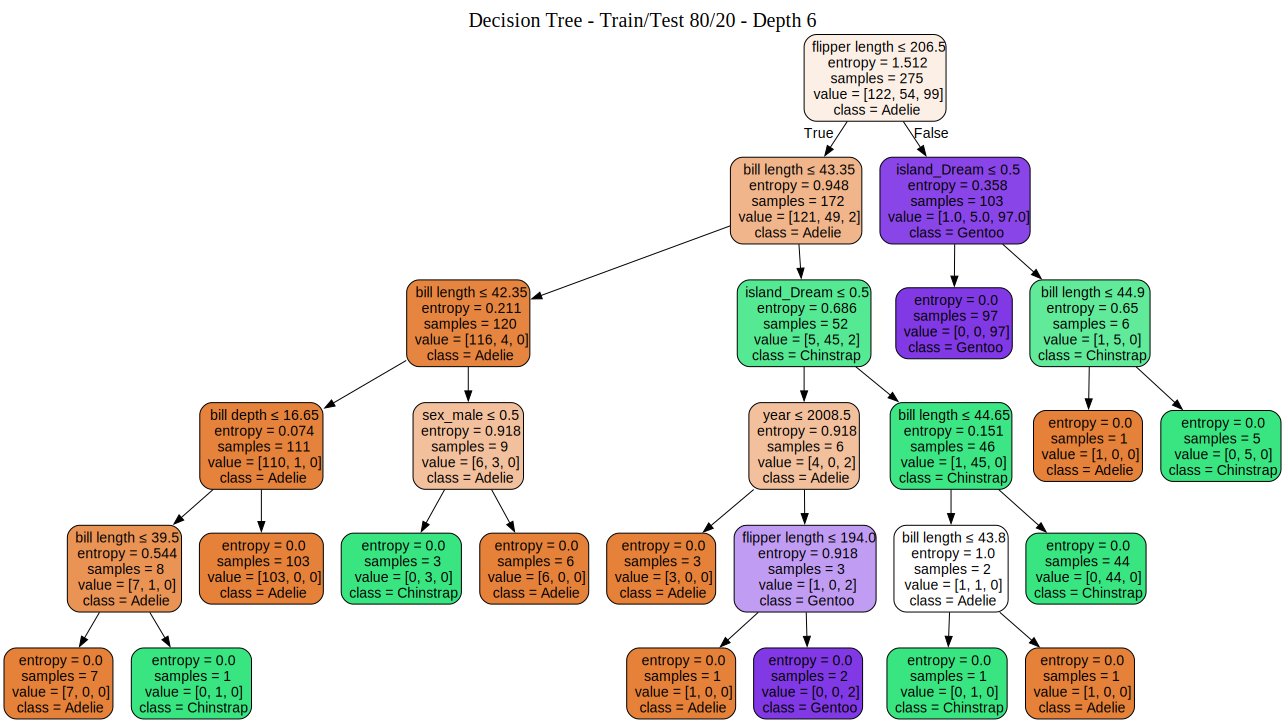

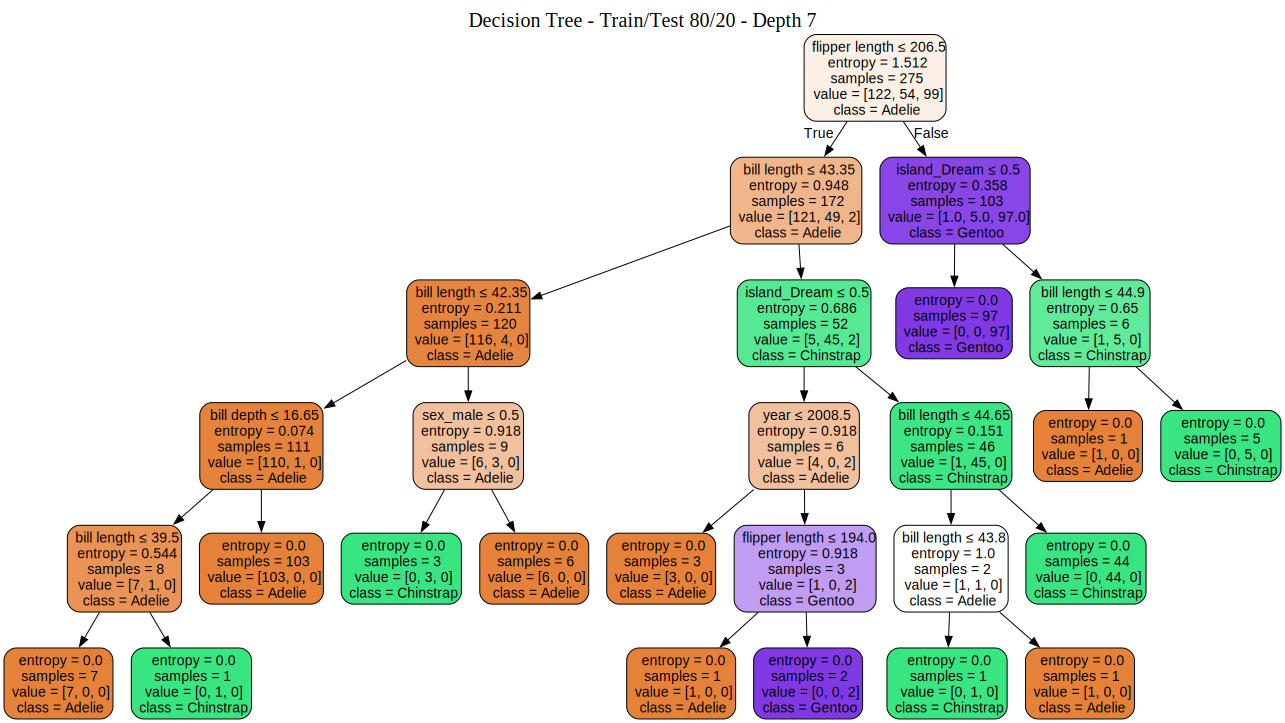

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming your 80/20 dataset is already prepared:
key = "80_20"
X_train = subsets[f"feature_train_{key}"]
y_train = subsets[f"label_train_{key}"]
X_test = subsets[f"feature_test_{key}"]
y_test = subsets[f"label_test_{key}"]

# Depths to try
depths = [None, 2, 3, 4, 5, 6, 7]

# Store results
accuracy_results = {}

for depth in depths:
    # Train decision tree
    clf = DecisionTreeClassifier(max_depth=depth, criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    depth_label = str(depth)
    accuracy_results[depth_label] = acc
    
    dot_data = export_graphviz(
        clf,  
        feature_names=X_train.columns, 
        class_names=clf.classes_, 
        filled=True, 
        rounded=True,
        special_characters=True,
        out_file=None,
    )
    
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Train/Test 80/20 - Depth {depth}";\nlabelloc=top;\nfontsize=20;'
    )    
    
    graph = graphviz.Source(dot_data)
    graph.render("img/palmer_penguins/decision_tree_80_20_depth" + depth_label, format='png', cleanup=True)
    display(graph)

## **5.2. Depth and accuracy**

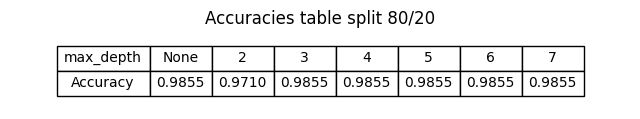

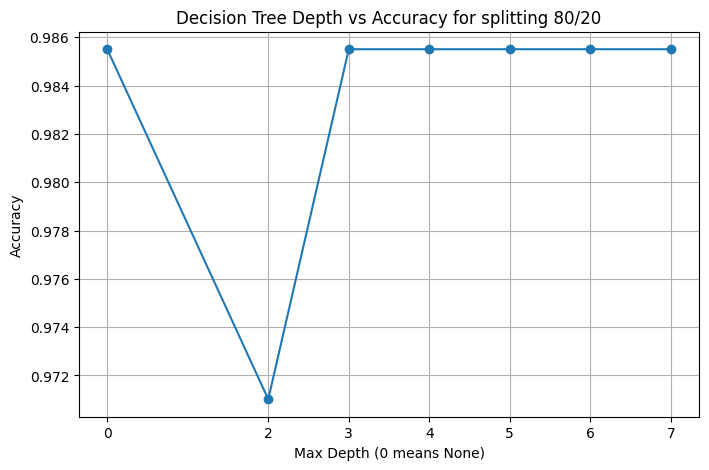

In [13]:
# Prepare data for the table
depth_labels = list(accuracy_results.keys())
accuracies = [f"{acc:.4f}" for acc in accuracy_results.values()]

# Create the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 1))
ax.axis('off')

table_data = [
    ["max_depth"] + depth_labels,
    ["Accuracy"] + accuracies
]

table = ax.table(
    cellText=table_data,
    loc='center',
    cellLoc='center',
    colWidths=[0.15] + [0.1] * len(depth_labels)
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Save the table as a PNG file
plt.title(f'Accuracies table split 80/20')
plt.savefig('img/palmer_penguins/accuracy_table_split_80_20.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Plot depth vs accuracy
plt.figure(figsize=(8, 5))
depth_labels = list(accuracy_results.keys())
acc_values = list(accuracy_results.values())

# For x-axis, handle 'None' separately
x_labels = [0 if d == "None" else int(d) for d in depth_labels]
plt.plot(x_labels, acc_values, marker='o')
plt.xticks(x_labels)
plt.xlabel('Max Depth (0 means None)')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy for splitting 80/20')
plt.grid(True)
plt.savefig('img/palmer_penguins/accuracy_chart_split_80_20.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
